# Основная задача

Необходимо защитить данные клиентов страховой компании, разработать метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию, после преоборазования которых, качество моделей машинного обучения не ухудшилось.

Импортируем необходимые модули

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

Создадим функцию, которая позволяет собрать всю необходимую информацю для первого просмотра таблицы.

In [2]:
def df_info(dataframe):
    column = dataframe.columns.values.tolist() # список наименований столбцов таблицы
    print('Общая информация о таблице:\n')
    dataframe.info() # общая иноформация о таблице
    print('\nВнешний вид таблицы:')
    display(dataframe.head()) # внешний вид первых 5 строк таблицы

    # далее выводим все интересующие нас особенности таблицы, соответствнно, обозначенные в функции print()
    print('Столбцы таблицы: {}\n'.format(column),
          '\n\nОбщее количество уникальных значений столбцов {}:\n\n{}'.
          format(column, dataframe.nunique()),
          '\n\nКоличество пропущенных значений столбцов {}:\n\n{}'.
          format(column, dataframe.isna().sum()))
    
    for i in column: # создадим цикл для перебора значений столбцов для отдельного примнения к ним любой функции
          print('\n\nКоличество дубликатов столбца:\n{}\t   {}'.format(i, dataframe[i].duplicated().sum()))
    print('\nОбщее количество явных дубликтов: {}'.format(dataframe.duplicated().sum()))
    print('\n\nТаблица корреляций значений столбцов {}:\n\n{}'.format(column, dataframe.corr()), '\n',
          '\n\nТаблица распределений значений столбцов {}:\n\n{}'.format(column, dataframe.describe()), '\n')
    print('Гистограммы распределений значений столбцов {}'.format(column))
    dataframe.hist(bins=50, figsize=(15, 7), edgecolor = 'k')

In [3]:
RS = 12345

## Загрузка данных

In [4]:
df = pd.read_csv('/datasets/insurance.csv')

Просмотрим общую информацию о таблице с помощью функции выше.

Общая информация о таблице:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB

Внешний вид таблицы:


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


Столбцы таблицы: ['Пол', 'Возраст', 'Зарплата', 'Члены семьи', 'Страховые выплаты']
 

Общее количество уникальных значений столбцов ['Пол', 'Возраст', 'Зарплата', 'Члены семьи', 'Страховые выплаты']:

Пол                    2
Возраст               46
Зарплата             524
Члены семьи            7
Страховые выплаты      6
dtype: int64 

Количество пропущенных значений столбцов ['Пол', 'Возраст', 'Зарплата', 'Члены семьи', 'Страховые выплаты']:

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64


Количество дубликатов столбца:
Пол	   4998


Количество дубликатов столбца:
Возраст	   4954


Количество дубликатов столбца:
Зарплата	   4476


Количество дубликатов столбца:
Члены семьи	   4993


Количество дубликатов столбца:
Страховые выплаты	   4994

Общее количество явных дубликтов: 153


Таблица корреляций значений столбцов ['Пол', 'Возраст', 'Зарплата', 'Члены семьи', 'Страховые выплаты']:

                 

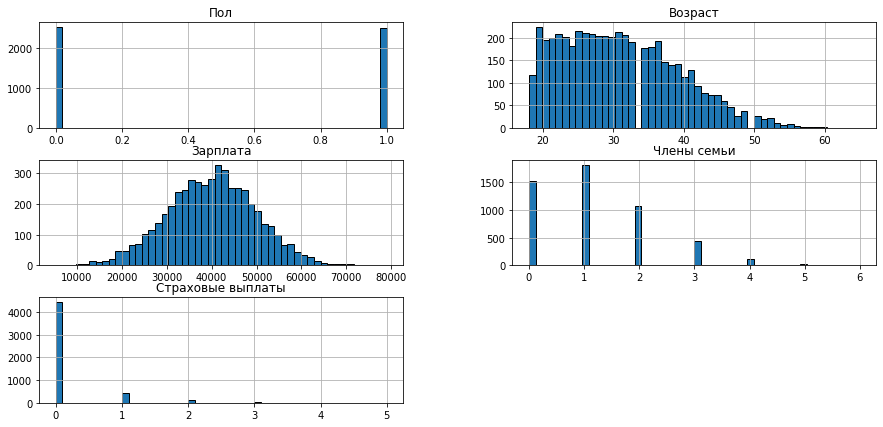

In [5]:
df_info(df)

Удалим явные дубликаты

In [6]:
df = df.drop_duplicates()

Проверим, нет ли дубликатов

In [7]:
df.duplicated().sum()

0

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** качество линейной регрессии не изменится при условии, если исходная матрица невырожденная и квадратная, так как только для квадратной матрицы может существовать обратная ей.

**Обоснование:** допустим, существует некое $w`$, которе равно $((XP)^TXP)^{-1}(XP)^Ty$

Тогда:
$$
w` =  ((XP)^T XP)^{-1} (XP)^Ty = (P^TX^TXP)^{-1} P^TX^Ty  = P^{-1} (X^TX)^{-1} (P^T)^{-1} P^TX^Ty = P^{-1}(X^TX)^{-1} X^Ty = P^{-1} w 
$$

И далее окажется, что предсказание по новой матрице равно следующему:
$$
a` = XPw` = XPP^{-1}w = Xw = a
$$

Следовательно, качество обучения линейной регрессии не изменится.


## Алгоритм преобразования

**Алгоритм**

По аналогии с вышеуказанным доказательством создадим такой же алгоритм, а именно: создаем обратимые матрицы соответствующего размера нашим исходным матрицам, умножаем обратимую матрицу на матрицу наших исходных признаков. После этого проверим значение метрик перед преобразованием исходной матрицы и после преобразавания.

**Обоснование**

Качество линейной регрессии не изменится при условии, если исходная матрица невырожденная и квадратная (определитель не равен нулю), так как только для квадратной матрицы может существовать обратная ей.

## Проверка алгоритма

Создадим выборки треиновочную и тестовую.

In [8]:
df_train, df_test = train_test_split(df, random_state=RS)

Создадим класс линейной регресси, дополнив ее функцией измерения метрики R2.

In [9]:
# Создадим класс модели обучения
class Linear_Regression:
    def fit(self, features_train, target_train):
        X = np.concatenate((np.ones((features_train.shape[0], 1)), features_train), axis=1)
        y = target_train
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]
    def predict(self, features_test):
        return features_test @ self.w + self.w0
    def score(self, features, target, set_name):
        print('Значение метрики R2 на {} выборке: {:.3f}'.format(set_name, r2_score(target, self.predict(features))))

In [10]:
# Создадим переменную модели обучения до преобразования обратимой матрицей
model_before = Linear_Regression()

# Выделим призники и цели
features_train = df_train.drop('Страховые выплаты', axis=1)
target_train = df_train['Страховые выплаты']
features_test = df_test.drop('Страховые выплаты', axis=1)
target_test = df_test['Страховые выплаты']

model_before.fit(features_train,target_train)
model_before.score(features_train, target_train, 'тренировочной')
model_before.score(features_test, target_test, 'тестовой')

Значение метрики R2 на тренировочной выборке: 0.432
Значение метрики R2 на тестовой выборке: 0.423


Реализуем умножение обучающих признаков на обратимую матрицу `Р`

In [11]:
# Создаём случайную матрицу тех же размеров, что и матрица исходных признков
P_matrix = np.array([])
while True:
    # Создаём случайную матрицу
    P_matrix = np.random.random((features_train.shape[1], features_train.shape[1]))
    # Проверяем наличие обратной матрицы:
    try:
        # Если матрица обратима, то выходим из цикла
        np.linalg.inv(P_matrix)
        break
    except:
        continue

Теперь проверим, работает ли наша гипотеза

In [12]:
# Модель линейной регрессии с изменёнными признаками после умножения на обратимую матрицу
model_after=Linear_Regression()

features_train_changed = features_train @ P_matrix
features_test_changed = features_test @ P_matrix

model_after = Linear_Regression()
model_after.fit(features_train_changed, target_train)

model_after.score(features_train_changed, target_train, 'тренировочной')
model_after.score(features_test_changed, target_test, 'тестовой')

Значение метрики R2 на тренировочной выборке: 0.432
Значение метрики R2 на тестовой выборке: 0.423


# Выводы

Таким образом видно, что при умножении исходных признаков на обратимую матрицу можно увидеть, что исходная матрица меняется, однако работа алгоритма линейной регрессии не меняется. Следовательно, использование умножения исходных матриц на обратимую позволяет зашифровать исходные данные.